# Introduction

This project analyzes data from the online dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. 
The goal of this project is to scope, prep, analyze, and create a machine-learning model to solve a question.

**Data sources:**

`profiles.csv` was provided by Codecademy.com.

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to defines the high-level objectives and sets the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which includes the methods and aligning the question(s) with the project goals. Lastly, the evaluation will help build conclusions and findings from the analysis.

### Project Goals

The purpose of this project is to use the skills taught at Codecademy and apply machine learning algorithms to a dataset. The key research topic will be whether an OkCupid user's astrological sign can be predicted based on other data in their profiles. This project is significant since many users consider astrological signs to be an important element of matches, and if users do not enter their sign, OkCupid attempts to forecast which sign they may be. 

### Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short-answer questions.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project is to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented. 

### Evaluation

The research will culminate with an evaluation of the chosen machine learning model against a validation data set. The predictions' output can be evaluated using a confusion matrix and measures like as accuracy, precision, recall, and F1 scores. 


## Import Python Modules

Firstly, the modules being used for this project are imported:

In [1]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

Here `profiles.csv` is loaded into a `DataFrame` called `profiles`. The `DataFrame` is then briefly examined using `.head()` to check the contents.


In [2]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
list(profiles.columns) 

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

## Data Exploration

The first topic to be investigated is the number of distinct signs and their values. It appears that there are 48 indicators, yet there should only be 12. On closer scrutiny, the signs appear to have qualifiers linked to them. 

In [4]:
print("nnumber of categories:",profiles.sign.nunique())
print("categories:", profiles.sign.unique())

nnumber of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorp

#### Clean labels

It is critical that we clean the labels because that is what will be projected, and 48 predictions would be extremely challenging. By selecting the first word of the column, the signs can be saved without the qualifiers. The qualifiers could be utilized to solve another challenge in the future.

In [5]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
print("nnumber of categories:",profiles.signsCleaned.nunique())
print("categories:", profiles.signsCleaned.unique())

profiles.signsCleaned.value_counts()

nnumber of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


signsCleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

## Continuous Variables

#### age

The next graphic depicts the age distribution in the group. The majority of users appear to be in their late twenties or early thirties.

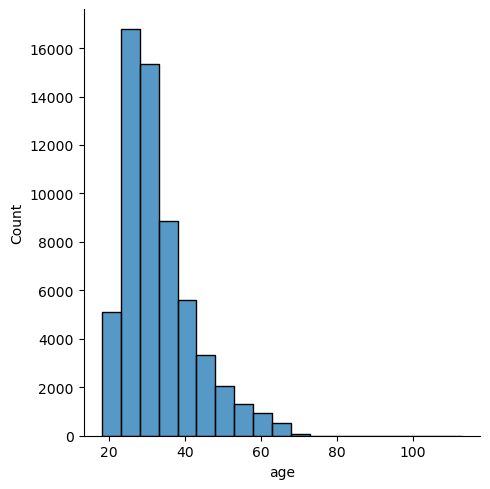

In [6]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5);

Here's the same chart, but broken down by gender. Gender breakdowns appear to be relatively comparable by age, with somewhat fewer females overall. 

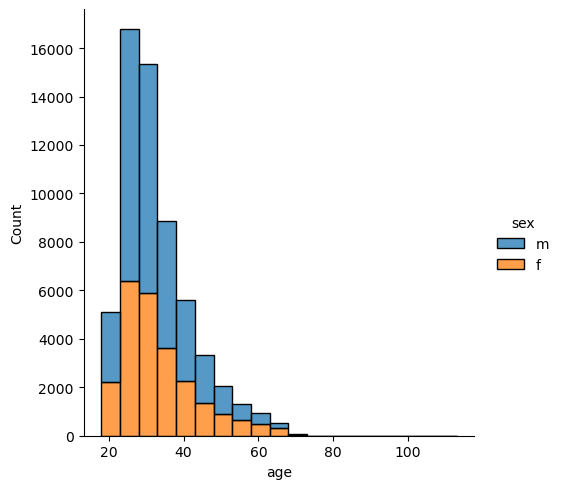

In [7]:
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

#### Height

The following plot depicts the height variable; most persons appear to be between 5 feet and 6.5 feet tall.

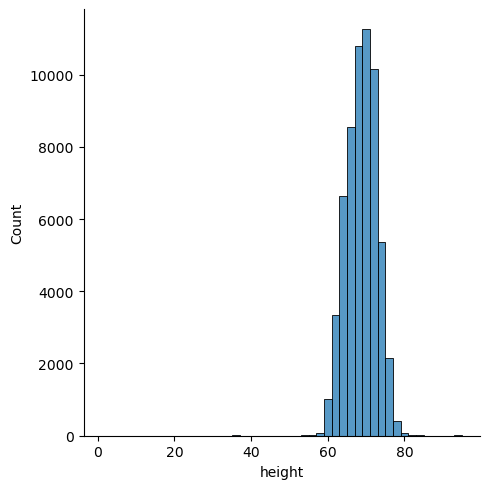

In [8]:
sns.displot(data=profiles, x="height", kind="hist", binwidth = 2);

Here is the same height chart showing the break down by gender. It seems obvious, but females tend to be shorter than males and looks to have a normal distribution. 

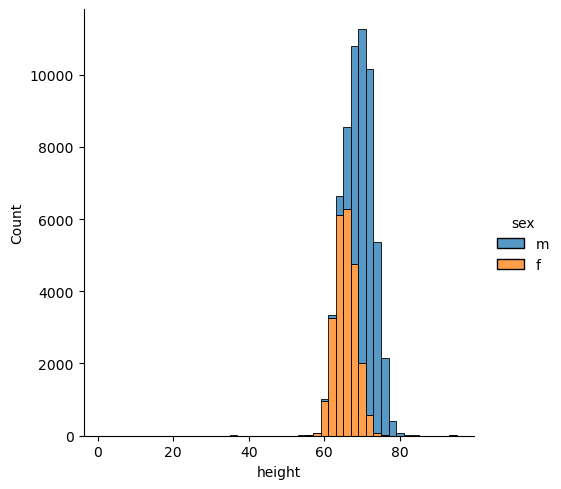

In [9]:
sns.displot(data=profiles, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack");

#### Income

Here is the data of income, it seems that the majority of the participants do not include their income figures.

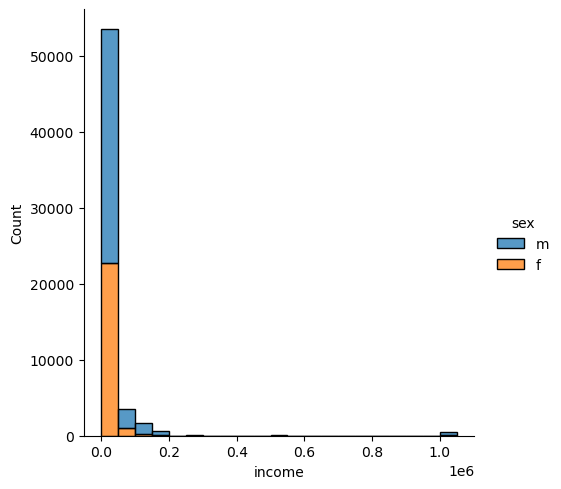

In [10]:
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");

### Discrete Variables

#### Body Type

The next chart shows the body type variable, and it seems that most users will describe themselves as average, fit, or athletic.

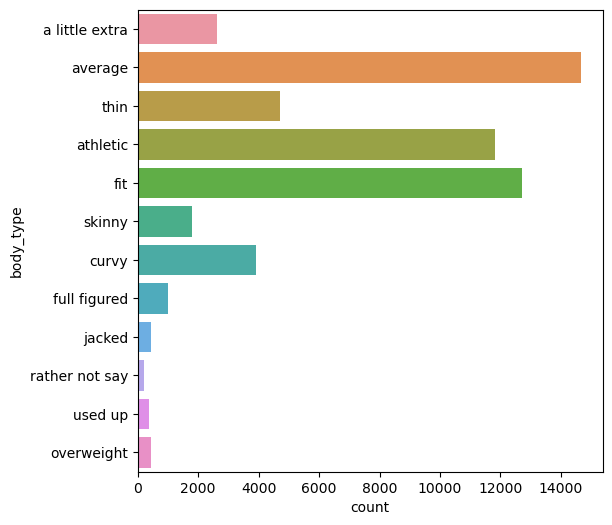

In [11]:
sns.countplot(data=profiles, y="body_type");

The next chart shows the break down of body type by gender and it seems that some of the body type descriptions are highly gendered. For example "curvy" and "full figured" are highly female descriptions, while males use "a little extra", and "overweight" more often.

#### Drinks

The next plot shows that the majority of the users drink "socially", then "rarely" and "often". 

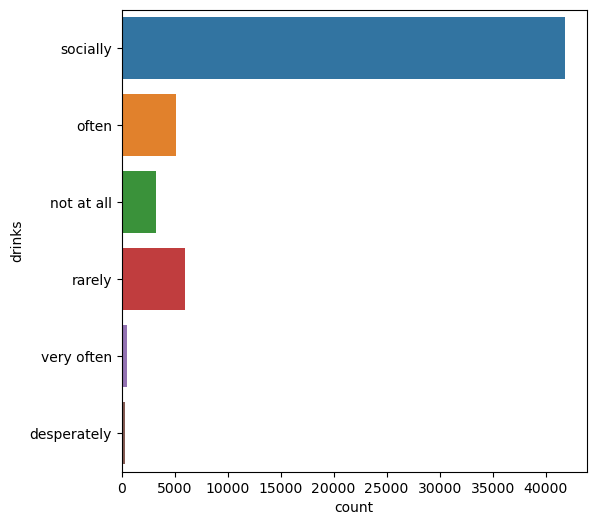

In [12]:
sns.countplot(data=profiles, y="drinks");

#### Education

The bulk of users are college/university graduates, followed by those pursuing master's degrees and those working in college/university. Interestingly, space camp-related options are relatively popular.

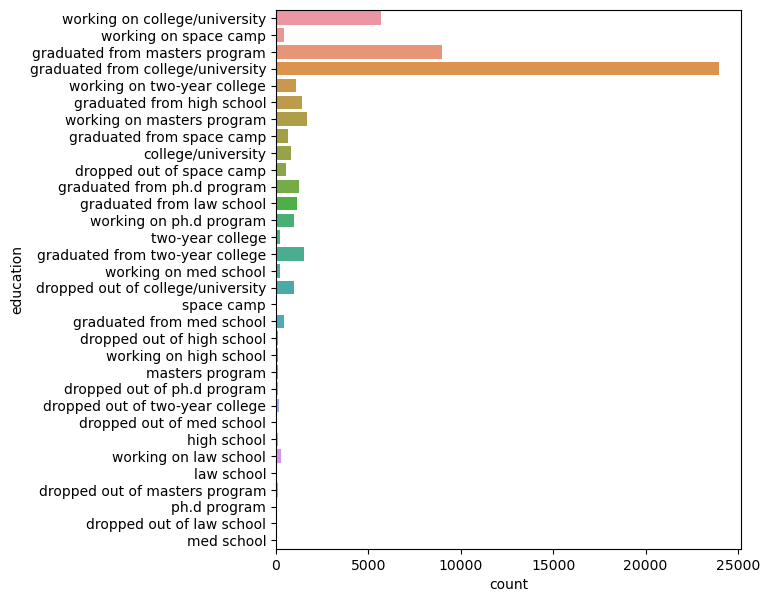

In [13]:
plt.figure(figsize=(6,7))

sns.countplot(data=profiles, y="education");

#### Jobs

The majority of users do not fit into the listed categories, but there are some students, artists, techies, and business owners. 

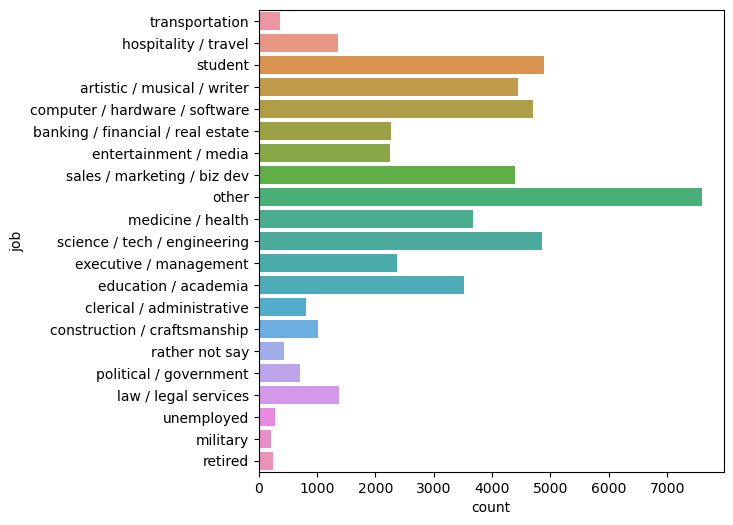

In [14]:
sns.countplot(data=profiles, y="job");

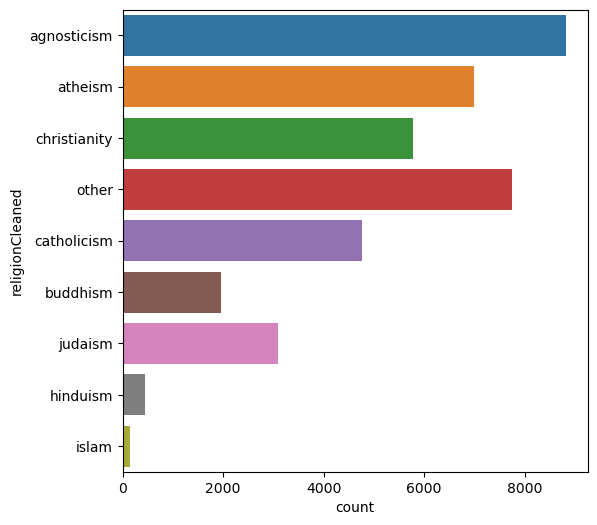

In [15]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned");

#### Signs

Here are the users' astrological signs. They are primarily evenly distributed, with Capricorns being the rarest and Leos the most prevalent.

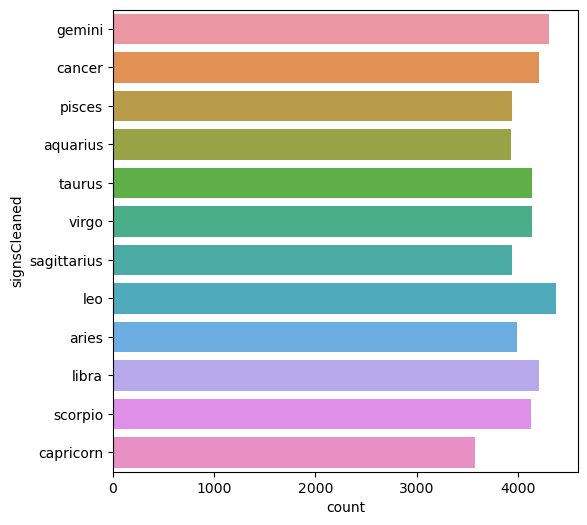

In [16]:
sns.countplot(data=profiles, y="signsCleaned");

### Data Preperation


#### Missing Data

Missing data is frequently mishandled by machine learning algorithms and must be reviewed, which may need to be imputed or eliminated. It appears that many of the columns have missing values. 

In [17]:
profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

#### Preprocessing 

Preparing data for modelling is critical because it speeds up the process and results in better models. As the saying goes, "garbage in, garbage out," thus we want to ensure that the data we enter into our modelling process is good enough to share with others.

The data for the model will be a subset of the variables. The variables were chosen because they could be a good predictor of astrological signs, although some of the variables that were not chosen, such as 'age,' were most likely not strong indications. 

Null values are removed to create a fully complete data set. 

In [18]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signsCleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

#### Dummy Variables

In this next step, dummy variables are created to deal with the categorical variables. Dummy variables will turn the categories per variable into their binary identifier. The data now has 81 columns to predict signs. 

In [19]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [20]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,cancer,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,taurus,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,sagittarius,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,cancer,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


#### Label Imbalance 
In the presented dataset, we see that the counts of all zodiac signs are roughly similar (i.e., without substantial variances). As a result, we no longer need to be concerned with imbalances and how to rectify them.

In [21]:
df.signsCleaned.value_counts()

signsCleaned
leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: count, dtype: int64

#### Splitting Data

Next, the data needs to be split into train and validation sets. In this split, 25% of the data is reserved for the final validation, while 75% is kept for training the model. 

In [22]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

### Prediction 

#### Model Development 

Now it's time to develop some models. For this project, three common algorithms will be used to make predictions. Below, the respective modules for Logistic Regression and Decision Trees are loaded.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Logistic Regression

The first model is using logistic regression with the `multi_class="multinomial"` argument. Using `lr_model` predictions are created from the training dataset which is used to figure out how well the model performed.


In [24]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

The logistic regression model's final accuracy is 12%, which is low given that a random estimate should be correct approximately 8% of the time.

In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



#### Decision Trees

The last model is the decision tree, the default `max_depth` is `none` which means that it will "If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.". The results are very promising because it has a 78% accuracy with this model.

In [27]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [28]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



Below is a confusion matrix of the results with the true values on the y-axis and predicted values along the x-axis. Since the diagonals are lighter in colour and have higher numbers, the accuracy is going to be high since those are the True Positives.

In [29]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

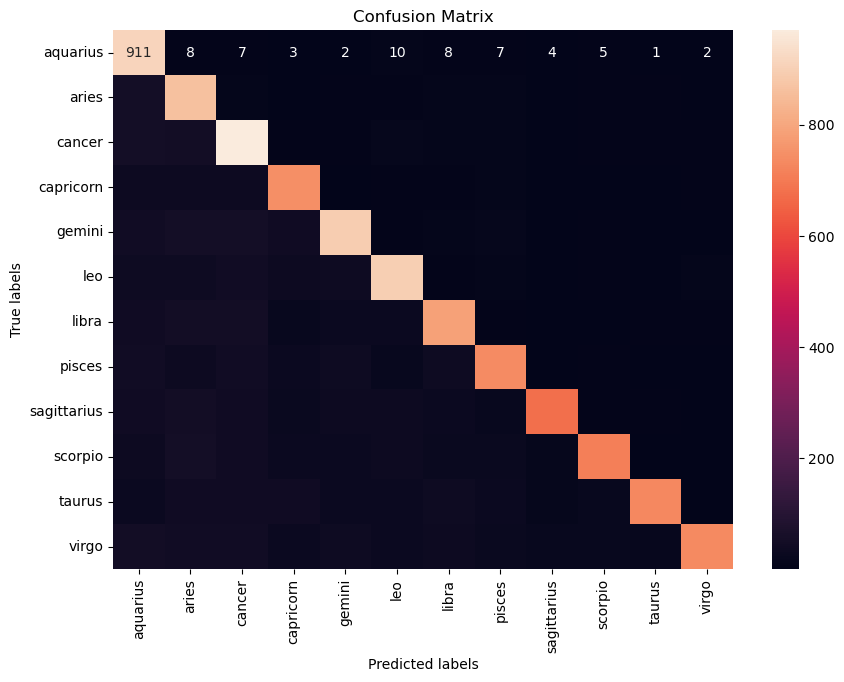

In [36]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

Going back to the model, a quick analysis will show that this tree model has a depth of 49 branches, which will probably not generalize to another dataset. In this case, this model has been "overfit" for this data. 

In [31]:
cart_model.get_depth()

49

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08063209 0.09197731 0.09035656 0.09724473 0.08836644]
Baseline: 8.97% (0.54%)


The decision tree model will be made it again, but with a `max_depth` of 20 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~41% is worse than the first iteration, but slightly better than the KNN model. 

### Conclusion


#### General Comments

In this project machine learning was used to predict the astrological signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

For prediction, a superior machine learning configuration, such as a deep neural network, can be used to generate an efficient model without overfitting. Hyperparameters like the optimizer, hidden layers, and learning rate can also be tweaked, as well as regularization techniques like dropout.


#### Next Steps 

The next steps will be to seriously consider whether it is possible to predict the user's astrological signs period, or if there is a way to do so with more data. Another possibility is to add additional models or tune the hyperparameters of the used models to see if any more predictive power could be squeezed out of the algorithms. 